In [ ]:
import pandas as pd
print(pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

2.1.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/bank-full.csv')

In [ ]:
file_path = '/content/drive/My Drive/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(4534, 17)

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 24060 to 45201
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4534 non-null   int64 
 1   job        4534 non-null   object
 2   marital    4534 non-null   object
 3   education  4534 non-null   object
 4   default    4534 non-null   object
 5   balance    4534 non-null   int64 
 6   housing    4534 non-null   object
 7   loan       4534 non-null   object
 8   contact    4534 non-null   object
 9   day        4534 non-null   int64 
 10  month      4534 non-null   object
 11  duration   4534 non-null   int64 
 12  campaign   4534 non-null   int64 
 13  pdays      4534 non-null   int64 
 14  previous   4534 non-null   int64 
 15  poutcome   4534 non-null   object
 16  y          4534 non-null   object
dtypes: int64(7), object(10)
memory usage: 637.6+ KB


In [ ]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

job
management       980
blue-collar      942
technician       761
admin.           681
services         424
self-employed    153
retired          144
student          133
entrepreneur     123
unemployed       119
housemaid         74
Name: count, dtype: int64

 marital
married     2535
single      1499
divorced     500
Name: count, dtype: int64

 education
secondary    2551
tertiary     1458
primary       525
Name: count, dtype: int64

 default
no     4501
yes      33
Name: count, dtype: int64

 housing
yes    2979
no     1555
Name: count, dtype: int64

 loan
no     3837
yes     697
Name: count, dtype: int64

 contact
cellular     4312
telephone     222
Name: count, dtype: int64

 month
may    1446
apr     651
nov     580
feb     532
jan     336
aug     292
jun     163
oct     161
sep     141
jul     100
mar      79
dec      53
Name: count, dtype: int64

 poutcome
failure    2876
other       885
success     773
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000
mean,39.327525,587.790693,14.159682,204.230922,1.549404,227.841420,2.239303
std,9.643921,645.174535,8.072477,119.531264,0.692596,108.625127,1.369949
min,18.000000,-1112.000000,1.000000,6.000000,1.000000,1.000000,1.000000
25%,32.000000,101.000000,7.000000,111.000000,1.000000,136.000000,1.000000
50%,37.000000,395.500000,14.000000,177.000000,1.000000,213.000000,2.000000
75%,46.000000,945.500000,19.000000,275.000000,2.000000,334.000000,3.000000
max,67.000000,2408.000000,31.000000,536.000000,3.000000,616.000000,6.000000


<Axes: >

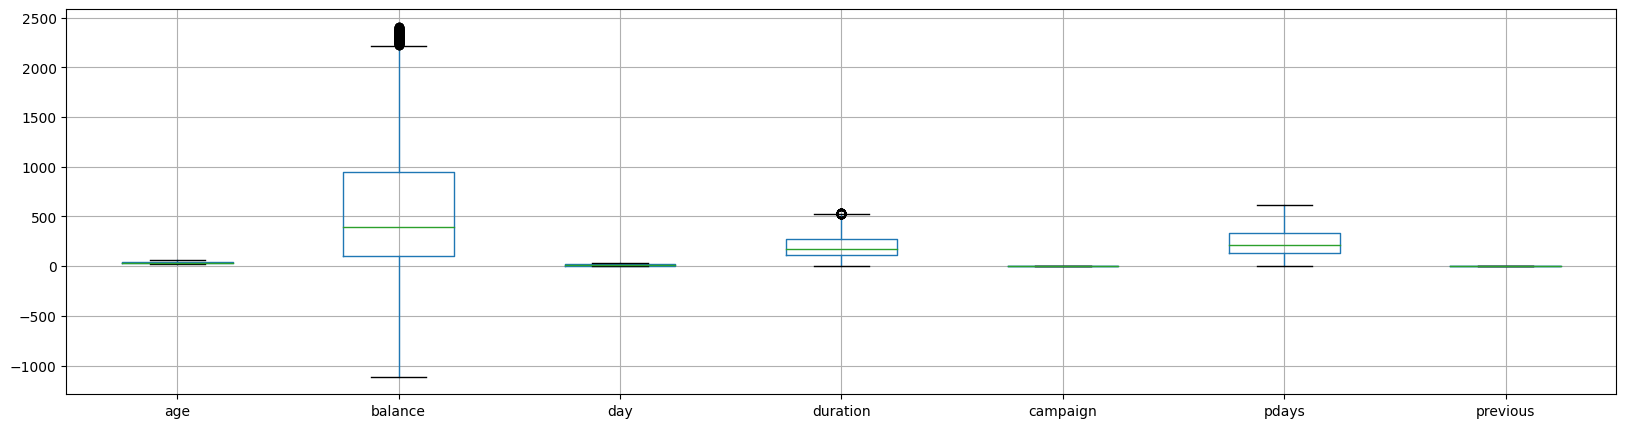

In [ ]:
df.boxplot(return_type='axes', figsize=(20,5))

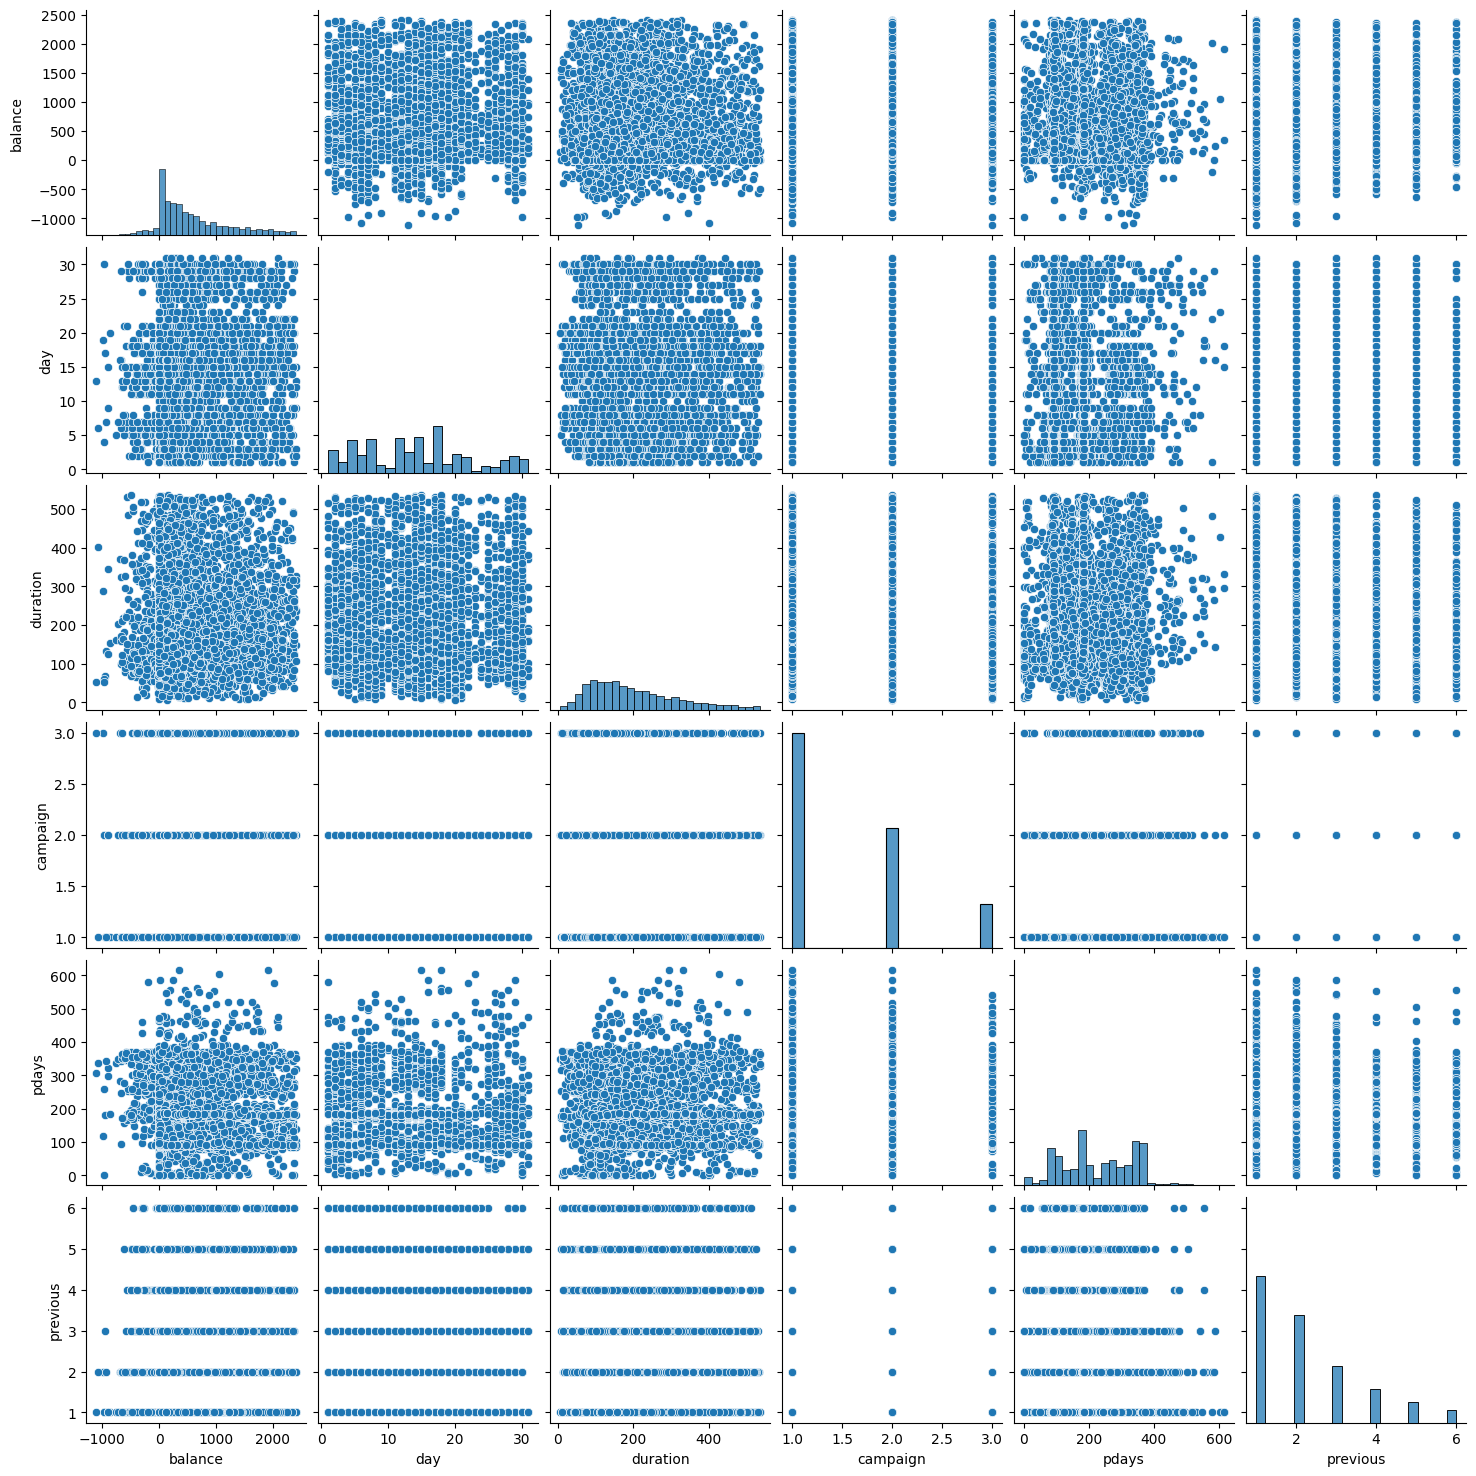

In [ ]:
sns.pairplot(df.iloc[:,1:])

In [ ]:
subscriber_counts = pd.DataFrame(df["y"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","y"]
subscriber_counts

,Labels,y
0,no,3706
1,yes,828


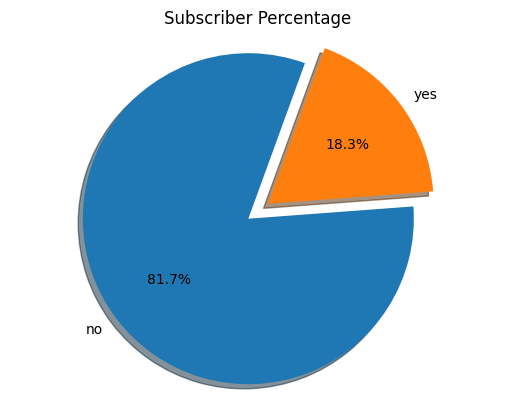

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["y"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()